In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_regression
from math import sqrt
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings

In [299]:
data = pd.read_csv("Cancer.csv")
data = data.drop(['Unnamed: 32', 'id'], axis = 1)
#data.head()
data.info()
nulls = data.isnull().sum() # No missing data
#nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

### Question 1: Data Exploration and Visualization

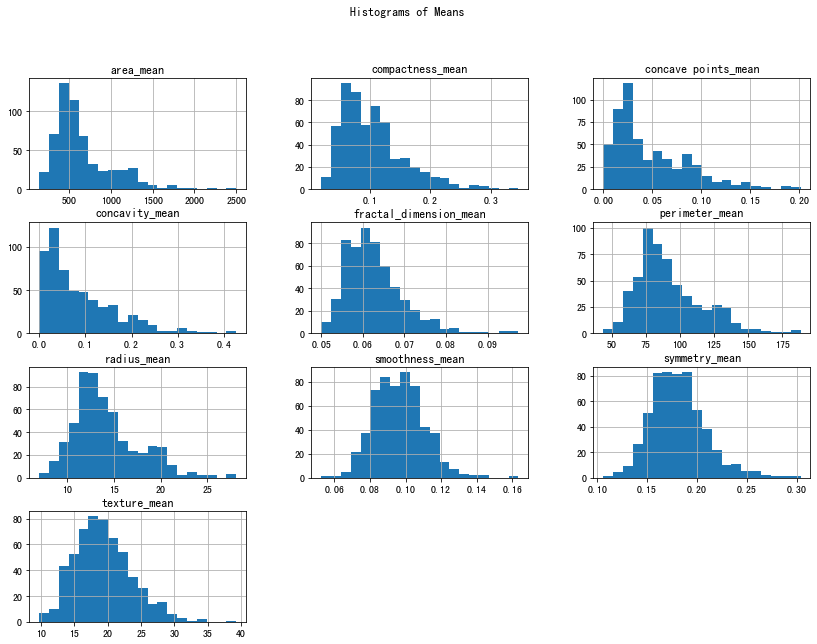

In [300]:
feats = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
            'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

## Histograms ##
data.hist(feats, bins=20, figsize=(14,10))
plt.suptitle('Histograms of Means')

plt.show()

#### Interpretation:
From the histogram graphs above, we can see that the mean of all attributes have a right tailed to normal distribution.

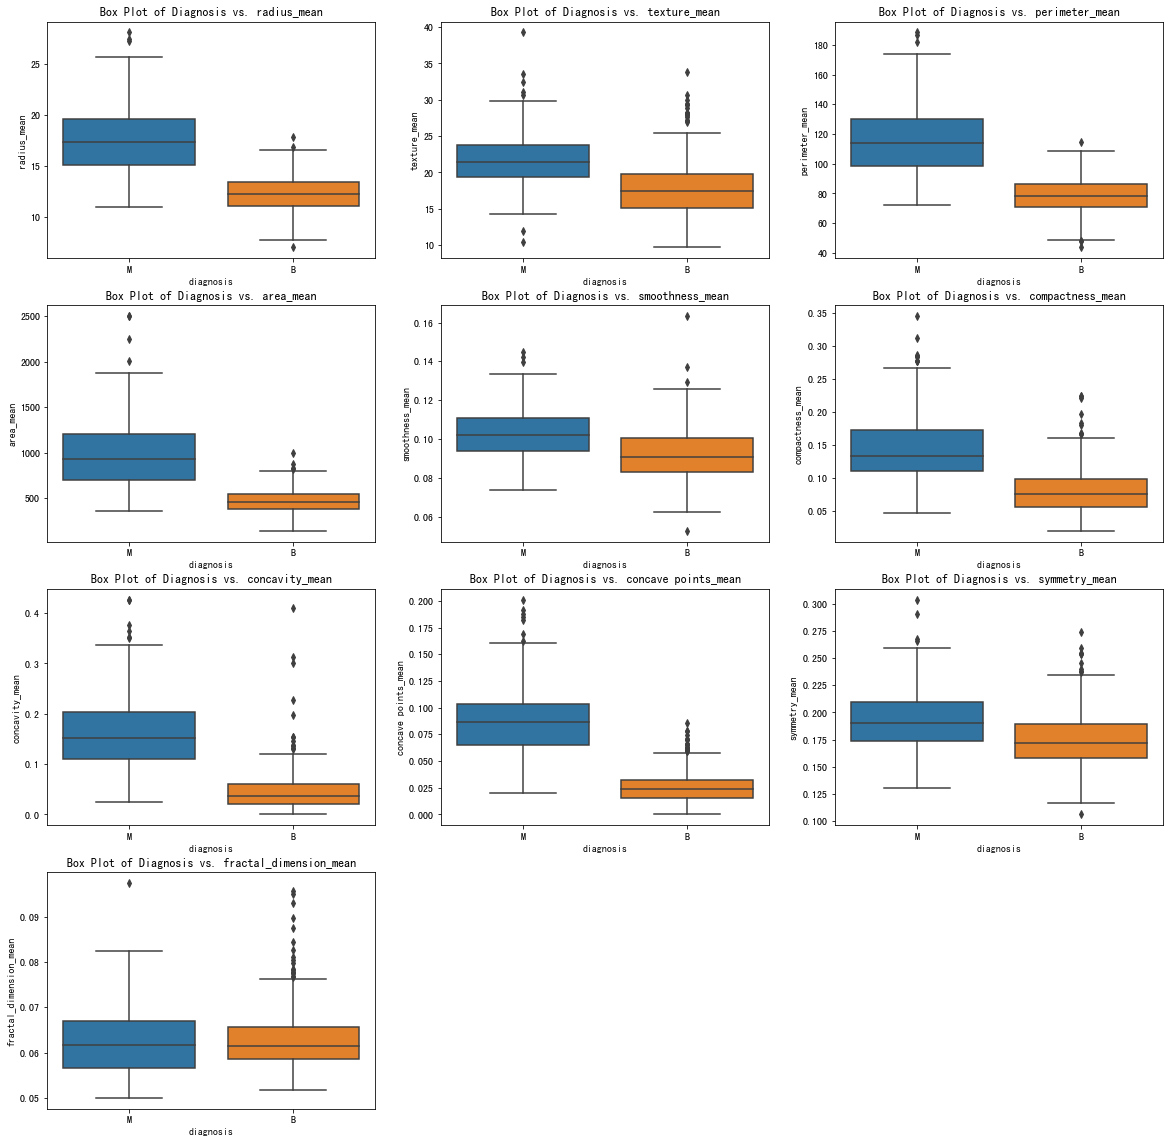

In [301]:
## Bloxplot ##
plt.figure(figsize=(20, 20))
for i, feature in enumerate(feats, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'Box Plot of Diagnosis vs. {feature}')

#### Interpretation:
From the boxplots of the mean above, we can see that malignant tumors tend to have larger medium in all of the attributes comparing than benign tumors.

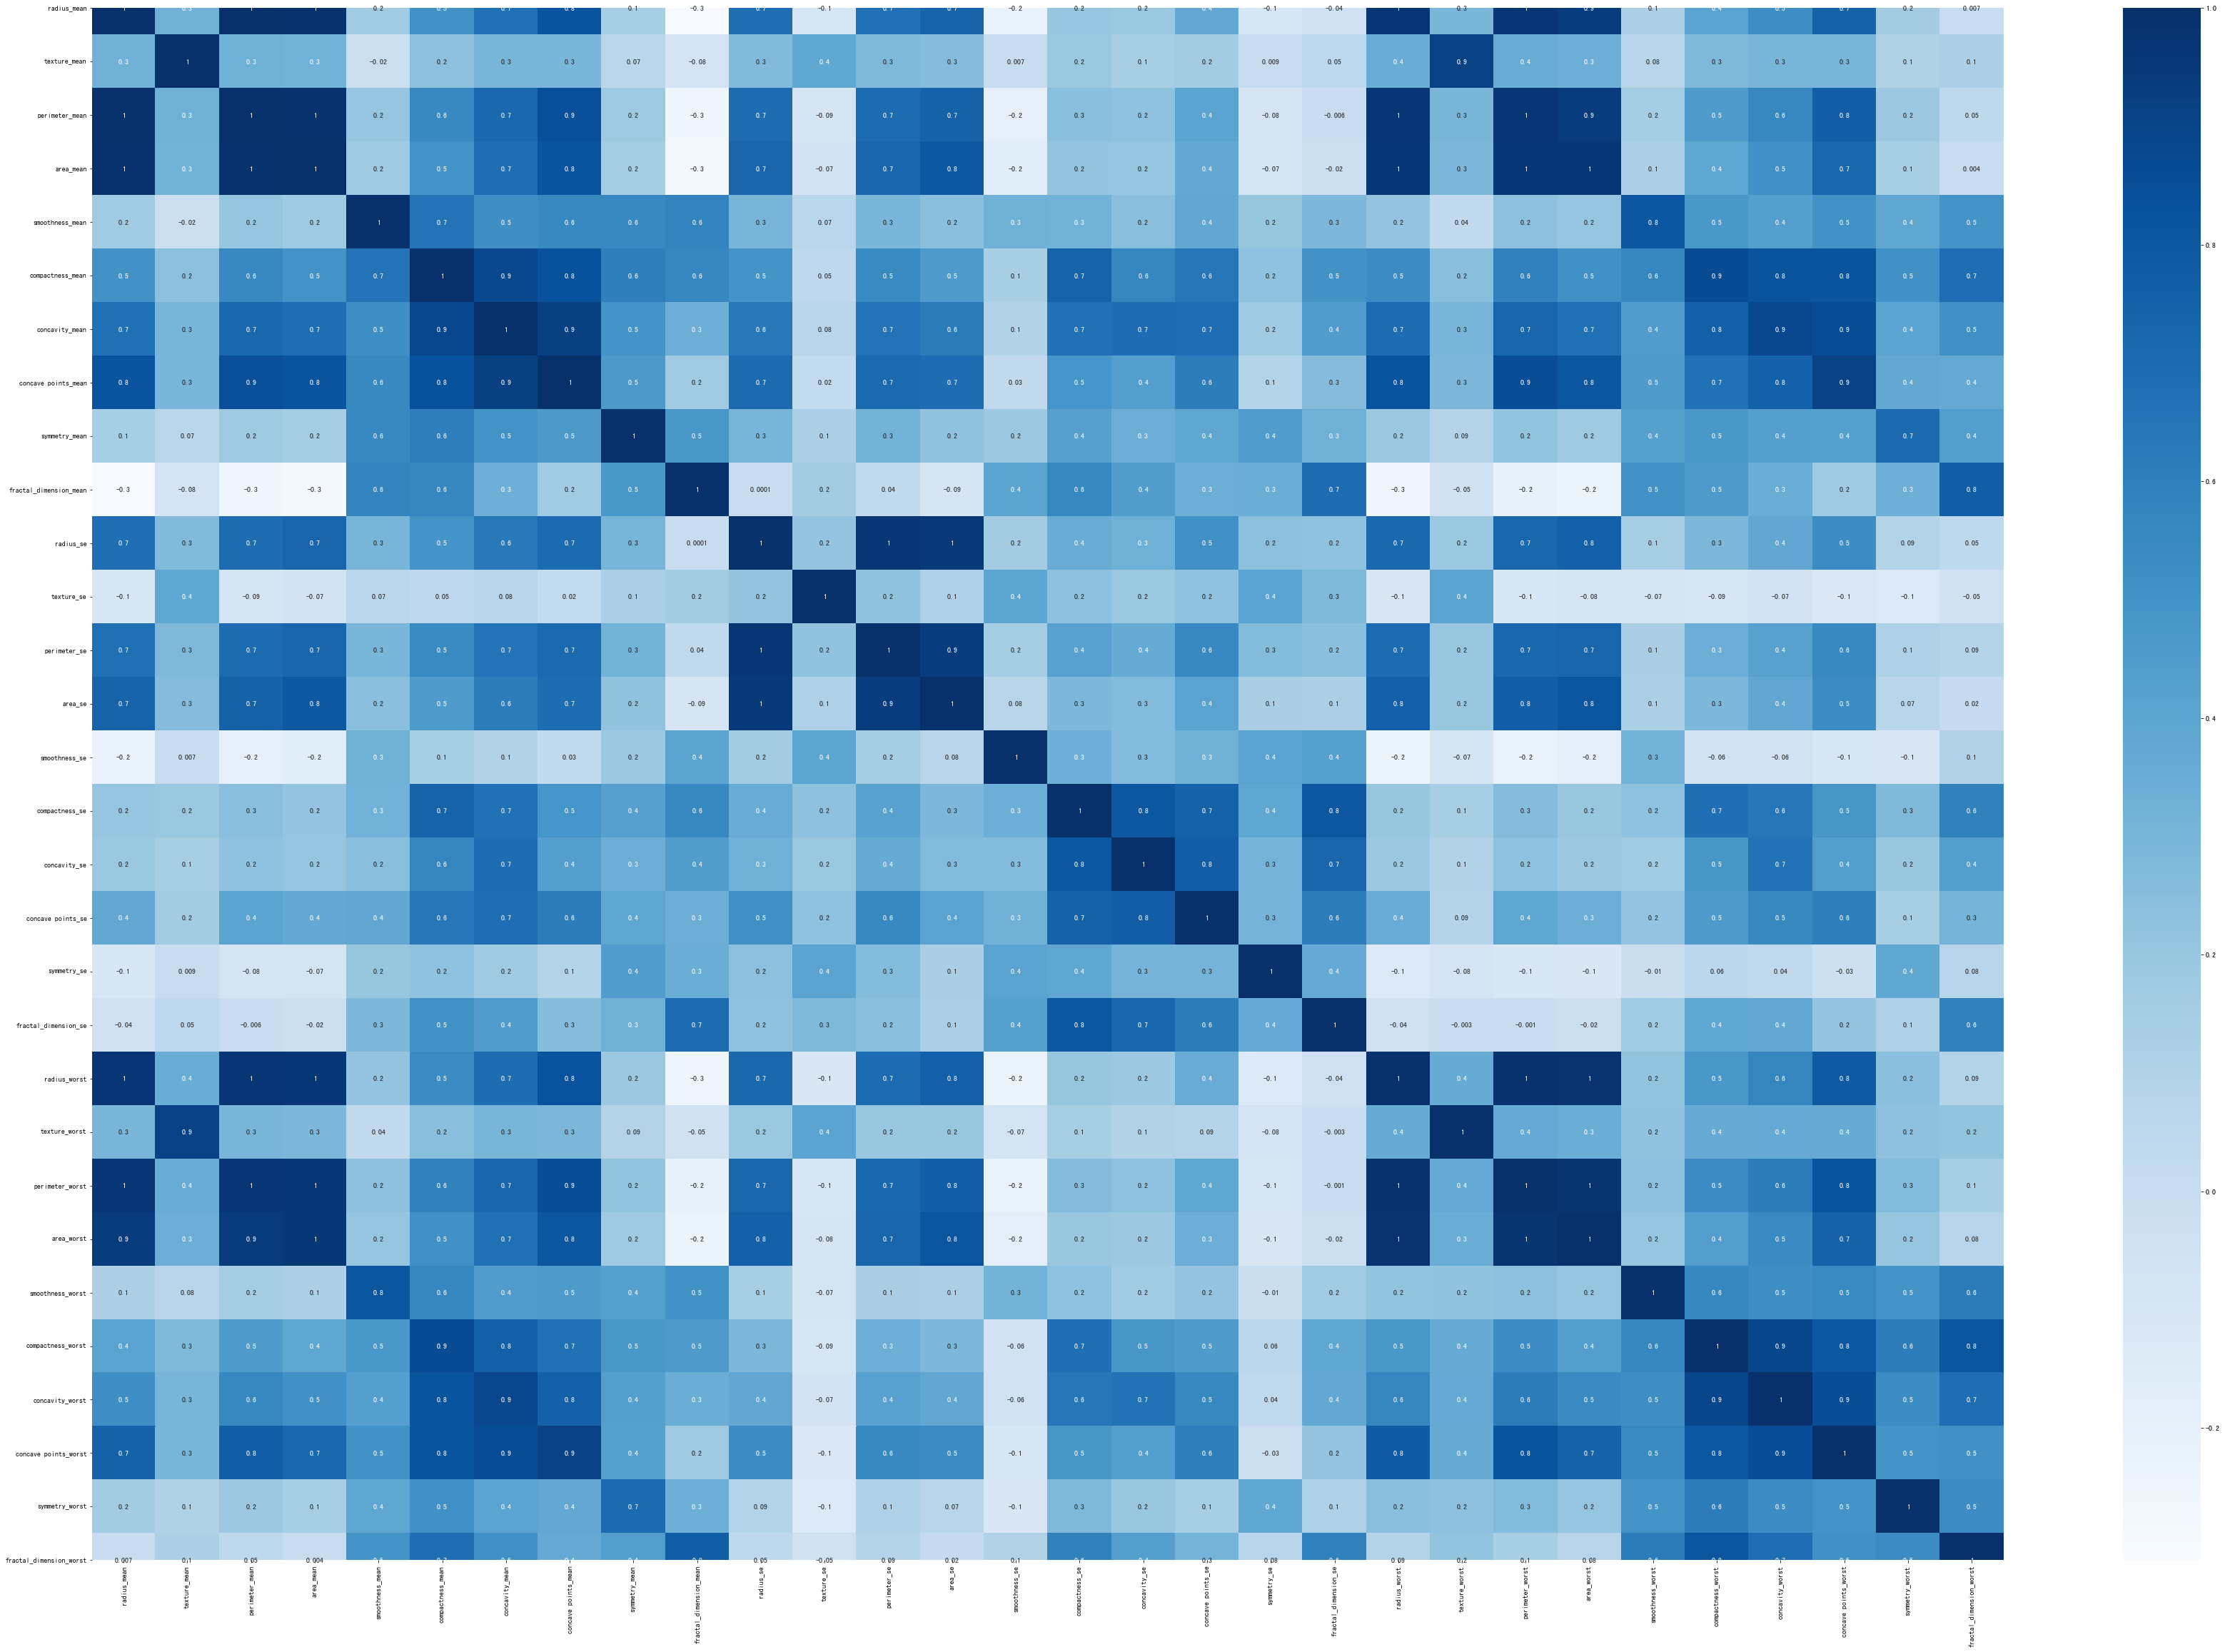

In [302]:
#Finding correlation of all the variables with the dependent variable.
cor=data.corr()
plt.figure(figsize=(60,40))
sns.heatmap(data=cor,annot=True,cmap='Blues',fmt='.1g')
plt.show()

#### Intepretation:
The heatmap shows that how different variables are correlated. We can see that the mean, se, and worst of the same attribute are correlated to each other.


### Question 2: Logistic Regression Model Development

In [303]:
warnings.filterwarnings("ignore")

## Encode M and B in Diagnosis to 1 and 0
Diagnosis = {'M': 1,'B': 0}
data.diagnosis = [Diagnosis[item] for item in data.diagnosis]

In [304]:
x=data.drop(["diagnosis"], axis=1)
y=data["diagnosis"]

x=sm.add_constant(X)
results = sm.GLM(y, x, family=sm.families.Binomial()).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      538
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 25 Jan 2024   Deviance:                          nan
Time:                        23:18:52   Pearson chi2:                 4.05e+16
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.688e+16   1.22e+08  -1.39e+08      0.000   -1.69e+16   -1.69e+16
radius_mean             -4.102e+15   4.93e+07  -8.32e+07      0.000    -4.1e+15    -4.1e+15
texture_mean             1.873e+13   2.26e+06    8.3e+06      0.000    1.87e+13    1.87e+13
perimeter_mean           5.872e+14   7.13e+06   8.24e+07      0.000    5.87e+14    5.87e+14
area_mean               -2.343e+11   1.49e+05  -1.57e+06      0.000   -2.34e+11   -2.34e+11
smoothness_mean          3.572e+16   5.73e+08   6.23e+07      0.000    3.57e+16    3.57e+16
compactness_mean        -3.963e+16   3.79e+08  -1.05e+08      0.000   -3.96e+16   -3.96e+16
concavity_mean            5.79e+15   2.97e+08   1.95e+07      0.000    5.79e+15    5.79e+15
concave points_mean      5.158e+15   5.62e+08   9.17e+06      0.000    5.16e+15    5.16e+15
symmetry_mean           -1.054e+16   2.11e+08     -5e+07      0.000   -1.05e+16   -1.05e+16
fractal_dimension_mean   2.698e+15   1.58e+09    1.7e+06      0.000     2.7e+15     2.7e+15
radius_se                5.769e+15   8.82e+07   6.54e+07      0.000    5.77e+15    5.77e+15
texture_se              -9.742e+13   1.05e+07  -9.31e+06      0.000   -9.74e+13   -9.74e+13
perimeter_se             -4.47e+14   1.17e+07  -3.83e+07      0.000   -4.47e+14   -4.47e+14
area_se                  3.858e+12   3.97e+05   9.72e+06      0.000    3.86e+12    3.86e+12
smoothness_se            3.758e+16   1.88e+09      2e+07      0.000    3.76e+16    3.76e+16
compactness_se           6.296e+16   6.16e+08   1.02e+08      0.000     6.3e+16     6.3e+16
concavity_se            -2.254e+16    3.7e+08   -6.1e+07      0.000   -2.25e+16   -2.25e+16
concave points_se        1.355e+17   1.55e+09   8.75e+07      0.000    1.35e+17    1.35e+17
symmetry_se             -3.607e+16   7.75e+08  -4.65e+07      0.000   -3.61e+16   -3.61e+16
fractal_dimension_se    -6.348e+17   3.32e+09  -1.91e+08      0.000   -6.35e+17   -6.35e+17
radius_worst             9.943e+14   1.65e+07   6.04e+07      0.000    9.94e+14    9.94e+14
texture_worst            6.518e+13   1.97e+06    3.3e+07      0.000    6.52e+13    6.52e+13
perimeter_worst          9.118e+12   1.69e+06   5.41e+06      0.000    9.12e+12    9.12e+12
area_worst              -5.373e+12   9.08e+04  -5.92e+07      0.000   -5.37e+12   -5.37e+12
smoothness_worst        -2.259e+15   4.08e+08  -5.54e+06      0.000   -2.26e+15   -2.26e+15
compactness_worst       -5.273e+15   1.09e+08  -4.85e+07      0.000   -5.27e+15   -5.27e+15
concavity_worst          3.733e+15   7.63e+07   4.89e+07      0.000    3.73e+15    3.73e+15
concave points_worst     2.287e+15    2.6e+08   8.81e+06      0.000    2.29e+15    2.29e+15
symmetry_worst           9.456e+15    1.4e+08   6.73e+07      0.000    9.46e+15    9.46e+15
fractal_dimension_worst  5.576e+16   6.77e+08  

In [305]:
vif = pd.DataFrame()
vif['Columns'] = x.columns

for col_no in range(len(x.columns)):
    vif.at[col_no,'vif']=variance_inflation_factor(x.values, col_no)

drop_cols = vif[vif['vif']>5]['Columns'].values.tolist()
x2 = x.drop(drop_cols,axis=1)

In [306]:
model_2 = sm.GLM(y, x2, family=sm.families.Binomial()).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                            GLM   Df Residuals:                      566
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -370.40
Date:                Thu, 25 Jan 2024   Deviance:                       740.81
Time:                        23:18:52   Pearson chi2:                     632.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
symmetry_mean     4.3683      1.530      2.854      0.004       1.369       7.368
texture_se       -0.1955      0.177     -1.102      0.270      -0.543       0.152
smoothness_se  -142.9684     38.968     -3.669      0.000    -219.344     -66.592
=================================================================================
"""

### Question 3: Model Evaluation

In [307]:
#Evaluating the Model 2 that has no variables that are collinear (VIF<10)

#Creating the train, test split for our data
x_train, x_test, y_train, y_test = train_test_split(x2, y, train_size = 0.8, random_state = 30)

results_training = sm.GLM(y_train, x_train, family=sm.families.Binomial()).fit()

#Training model
print(results_training.summary())

y_pred = results_training.predict(x_test)

#Calculating the R-square
r_sq = r2_score(y_test, y_pred)

#Calculating the Root Mean Square Error (RMSE)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"The r-square of the model is {r_sq}, and the root mean square error is {rmse}.")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                            GLM   Df Residuals:                      452
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -294.40
Date:                Thu, 25 Jan 2024   Deviance:                       588.80
Time:                        23:18:52   Pearson chi2:                     519.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
symmetry_mean     4.5370      1.713      2.649

In [308]:
y_glm = results_training.predict(x_test)
y_glm = (y_glm > 0.5).astype(int)

glm_conf = confusion_matrix(y_test, y_glm)
glm_class = classification_report(y_test, y_glm)

print(glm_conf)
print(glm_class)

[[66  4]
 [38  6]]
              precision    recall  f1-score   support

           0       0.63      0.94      0.76        70
           1       0.60      0.14      0.22        44

    accuracy                           0.63       114
   macro avg       0.62      0.54      0.49       114
weighted avg       0.62      0.63      0.55       114



#### Interpretation
The R-square value for this model is about 0.0157, which indicates that the model explains approximately 1.57% of the variance in the diagnosis outcome, and that the model's predictive power is limited when it comes to explaining the variability of the response variable.

On the other hand, the RMSE value is around 0.483, which quantifies the average deviation of the predicted values from the observed data and suggests that the predictions are relatively close to the actual values. The RMSE suggests that on average, the model's predictions are within an error margin of roughly 48.29% from the true diagnosis status. Despite the low R-square, the RMSE shows the model has a moderate level of accuracy in its predictions.

Furthermore, the model has an accuracy of 0.63, which suggests that it has 63% correctness when it comes to predicting cancer. Again, only showing moderate level of accuracy.

### Question 4: Testing Interactions Between Features

In [309]:
## Interaction without categorical variables 

#We'll create interaction between variables from our model 2 

print(f"Variables in our model 2 {x2.columns}.")

#Create a copy of model_2_data 
x2_int1 = x2.copy()

#Creating interaction terms in our data
x2_int1['symmetry_mean_texture_se'] = x2_int1['symmetry_mean'] * x2_int1['texture_se']
x2_int1['symmetry_mean_smoothness_se'] = x2_int1['symmetry_mean'] * x2_int1['smoothness_se']
x2_int1['texture_se_smoothness_se'] = x2_int1['texture_se'] * x2_int1['smoothness_se']

# Creating x & y variables for regression
model_interaction = x2_int1
y_interaction = data['diagnosis']

# Splitting the data into training and testing sets
x_interaction_train, x_interaction_test, y_interaction_train, y_interaction_test = train_test_split(model_interaction, y_interaction, train_size=0.8, random_state=30)

#Adding the constant term
x_interaction_train = sm.add_constant(x_interaction_train)

# Fit a linear regression model
linear_model_interaction = sm.OLS(y_interaction_train, x_interaction_train)
linear_model_interaction = linear_model_interaction.fit()

# Display the summary
print(linear_model_interaction.summary())

Variables in our model 2 Index(['symmetry_mean', 'texture_se', 'smoothness_se'], dtype='object').
                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     15.06
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           9.95e-16
Time:                        23:18:52   Log-Likelihood:                -272.31
No. Observations:                 455   AIC:                             558.6
Df Residuals:                     448   BIC:                             587.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [310]:
## Interaction with categorical variables 

# Again we'll create interaction terms from model 2 variables, however now we'll only add them with our categorical variable 'diagnosis'.

# Create a copy of model_2_data 
x2_int2 = x2.copy()

for col in x2_int2.columns:
    x2_int2[f'diagnosis_{col}'] = data['diagnosis'] * x2_int2[col]

# Creating x & y variables for regression
model_interaction_2= x2_int2
y_interaction_2 = data['diagnosis']

# Splitting the data into training and testing sets
x_interaction_train_2, x_interaction_test_2, y_interaction_train_2, y_interaction_test_2 = train_test_split(model_interaction_2, y_interaction_2, train_size=0.8, random_state=30)

#Adding the constant term
x_interaction_train_2 = sm.add_constant(x_interaction_train_2)

# Fit a linear regression model
linear_model_interaction_2 = sm.OLS(y_interaction_train_2, x_interaction_train_2)
linear_model_interaction_2 = linear_model_interaction_2.fit()

# Display the summary
print(linear_model_interaction_2.summary())

                            OLS Regression Results                            
Dep. Variable:              diagnosis   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     4044.
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        23:18:52   Log-Likelihood:                 598.19
No. Observations:                 455   AIC:                            -1182.
Df Residuals:                     448   BIC:                            -1154.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Interpretation:
##### Model without Categorical Interactions:
The R-squared value is 0.168, which means only about 16.8% of the variance in the dependent variable is explained by the model. This is quite low, indicating a weak fit.

The p-values for the interaction term "symmetry_mean*smoothness_se" is significant (p < 0.05), which suggests this interaction is statistically meaningful in predicting the outcome.

The coefficients for the interaction terms are all negative, implying that the relationship between the predictors and the outcome decreases when considering the interaction effects.


##### Model with Categorical Interactions:
In the model with categorical interactions, the diagnosis variable is a binary indicator (0 for benign, 1 for malignant), and interacts with the continuous variables.

The R-squared value is greatly improved to 0.982, which means the model now explains 98.2% of the variance in the dependent variable, indicating a strong fit.

The interaction terms (diagnosis*symmetry_mean, diagnosis*texture_se, and diagnosis*smoothness_se) are all significant, with p-values close to 0. This indicates that the diagnosis status significantly changes the effect of these continuous variables on the outcome.

The positive coefficients for the interaction terms suggest that for one category of diagnosis, the effect of the continuous variables on the outcome is more defined.


##### Issues with Linear Regression for Binary Outcomes:
The use of linear regression for a binary outcome is evident here since the diagnosis variable is binary. While the R-squared is high, this could be misleading because the nature of the relationship between predictors and a binary outcome is sometimes non-linear which linear regression cannot capture.


##### Interpreting Interaction Terms:
The interaction terms' significance indicates that the relationship between the continuous variables and the outcome is not the same at all levels of diagnosis. If diagnosis is malignant, the impact of symmetry_mean on the outcome is increased by approximately 2 units compared to when diagnosis is benign, holding all other variables constant.


##### Implications:
We believe that for different diagnosis categories, the predictive power and direction of the continuous variables can change. In clinical settings, this could inform personalized treatment based on the interaction between these variables and patient diagnosis.

### Question 5: Feature Selection and Cross-Validation: Full vs. Reduced Model

In [311]:
# Running our full model 
# Full model
X=data.drop(["diagnosis"], axis=1)
print(len(X.columns))

y=data["diagnosis"]
x=sm.add_constant(X)
model = sm.Logit(y, x)
results_full_model = model.fit_regularized(method='l1')
# results_full_model = sm.GLM(y, x, family=sm.families.Binomial()).fit()
print(results_full_model.summary())

# print(f"And the estimated R-sqaured for the full model is {1-results_full_model.deviance/results_full_model.null_deviance}")

30
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.031488146940614505
            Iterations: 503
            Function evaluations: 518
            Gradient evaluations: 503
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      538
Method:                           MLE   Df Model:                           30
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                  0.9523
Time:                        23:18:53   Log-Likelihood:                -17.917
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.728e-131
                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

In [312]:
significant_cols=results_full_model.pvalues[results_full_model.pvalues<0.1]
print(significant_cols)

concavity_se     0.055385
texture_worst    0.098396
dtype: float64


In [313]:
#Function to determine the modified p* value based on the BH Procedure

def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N
  
  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")
  
  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
  
  return alpha, sorted_pvals[np.where(below_threshold)]

Alpha: 0.8645918951750657


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


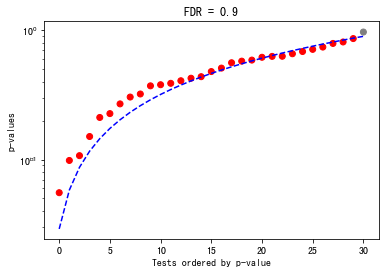

The number of true discoveries are 9.

These are the significant metrics that help us estimate the outstanding shares ['const', 'radius_mean', 'perimeter_mean', 'smoothness_se', 'compactness_se', 'fractal_dimension_se', 'radius_worst', 'compactness_worst', 'concave points_worst'].

The coefficient of these significant metrics that help us estimate the outstanding shares are shown below. 

const                    -8.962928
radius_mean              -6.997856
perimeter_mean           -1.338706
smoothness_se           539.171459
compactness_se           61.634909
fractal_dimension_se   -606.845485
radius_worst             -2.002854
compactness_worst       -17.654955
concave points_worst     48.377446
dtype: float64.


In [314]:
#Since we didn't get any significant co-efficients, we'll set a high false discovery rate for our reduced model

# False discovery control rate with q=0.9
alpha_threshold, below_threshold = fdr(results_full_model.pvalues, 0.9, plotit=True)

#Finding the significant metrics
significant_cols=results_full_model.pvalues[results_full_model.pvalues.isin(below_threshold)]

#Finding the coefficients of these significant metrics
significant_cols_coef=results_full_model.params[results_full_model.params.reset_index()["index"].isin(significant_cols.index.tolist()).tolist()]

print(f"The number of true discoveries are {len(below_threshold)}.\n")
print(f"These are the significant metrics that help us estimate the outstanding shares {significant_cols.index.tolist()}.\n")
print(f"The coefficient of these significant metrics that help us estimate the outstanding shares are shown below. \n\n{significant_cols_coef}.")

In [315]:
#Storing the significant cols from the FDR method from our full model, removing the 'const' and storing them.

significant_cols=significant_cols.index.tolist()
significant_cols.remove('const')
print(significant_cols)

['radius_mean', 'perimeter_mean', 'smoothness_se', 'compactness_se', 'fractal_dimension_se', 'radius_worst', 'compactness_worst', 'concave points_worst']


In [316]:
# Running the logistic regression on the reduced model

# Reduced model
X_reduced=data[significant_cols].copy()
y_reduced=data["diagnosis"].copy()
X_reduced=sm.add_constant(X_reduced)
model_reduced = sm.Logit(y_reduced, X_reduced)
results_reduced_model = model_reduced.fit_regularized(method='l1')
# results_reduced_model = sm.GLM(y_reduced, X_reduced, family=sm.families.Binomial()).fit()
print(results_reduced_model.summary())



# print(f"And the estimated R-sqaured for the reduced model is {1-results_reduced_model.deviance/results_reduced_model.null_deviance}")


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.10394684470812018
            Iterations: 132
            Function evaluations: 135
            Gradient evaluations: 132
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      560
Method:                           MLE   Df Model:                            8
Date:                Thu, 25 Jan 2024   Pseudo R-squ.:                  0.8426
Time:                        23:18:53   Log-Likelihood:                -59.146
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.742e-131
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

In [317]:
# Running the cross-validation for the full model

X = data.drop('diagnosis', axis=1)
X = sm.add_constant(X)
y = data['diagnosis']

# Define the model with intercept
full_model = LogisticRegression(fit_intercept=True)

#Creating a pipeline
pipeline = make_pipeline(StandardScaler(), full_model)

#Setting the the 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

#Defining the scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

#Performing the 10-fold cross-validation
results_full = cross_validate(pipeline, X, y, cv=kfold, scoring=scoring)

# Print the mean and standard deviation of each metric
print("Mean Scores:")
print(f"Mean Accuracy: {np.mean(results_full['test_accuracy'])}")
print(f"Mean Precision: {np.mean(results_full['test_precision'])}")
print(f"Mean Recall: {np.mean(results_full['test_recall'])}")
print(f"Mean F1 Score: {np.mean(results_full['test_f1'])}")

Mean Scores:
Mean Accuracy: 0.9736528822055138
Mean Precision: 0.9692487922705315
Mean Recall: 0.9616545723760692
Mean F1 Score: 0.9645874177536751


In [318]:
# Running the cross-validation for the reduced model

X_reduced=data[significant_cols].copy()
y_reduced=data['diagnosis'].copy()
X_reduced=sm.add_constant(X_reduced)

#Defining the model with intercept
reduced_model = LogisticRegression(fit_intercept=True)

#Creating a pipeline
pipeline = make_pipeline(StandardScaler(), reduced_model)

#Setting the the 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

#Defining the scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

#Performing the 10-fold cross-validation
results_reduced = cross_validate(pipeline, X_reduced, y_reduced, cv=kfold, scoring=scoring)

# Print the mean and standard deviation of each metric
print("Mean Scores:")
print(f"Mean Accuracy: {np.mean(results_reduced['test_accuracy'])}")
print(f"Mean Precision: {np.mean(results_reduced['test_precision'])}")
print(f"Mean Recall: {np.mean(results_reduced['test_recall'])}")
print(f"Mean F1 Score: {np.mean(results_reduced['test_f1'])}")

Mean Scores:
Mean Accuracy: 0.950751879699248
Mean Precision: 0.9447222222222222
Mean Recall: 0.9253284557009822
Mean F1 Score: 0.9318393697033738


#### Interpretation
After comparing the full logistic regression model, which uses a complex array of predictors, and the reduced model, which utilizes only statistically significant predictors identified by the FDR , we noticed that the full model achieves better metrics in terms of accuracy, precision, recall, and F1 score.

The robust 10-fold cross-validation method indicates that the full model has a mean accuracy of approximately 0.974, precision of 0.969, recall of 0.962, and an F1 score of 0.965.

On the other hand, the reduced model presents somewhat lower metrics, with a mean accuracy of around 0.951, precision of 0.945, recall of 0.925, and an F1 score of 0.932.

However, it is important to note that full model, due to its complexity, holds a considerable risk of overfitting. The reduced model, however, while showing barely lower performance, offers a more conservative approach. By incorporating only significant predictors, it reduces the potential for overfitting. This simplicity not only makes the model more interpretable but also enhances its efficiency and its robustness against the fluctuations.

Thus, in the interest of developing a robust, reliable, and generalizable model, the reduced model emerges as our choice, confidently favored over the full model.